In [298]:
import pandas as pd
import numpy as np
import random
import warnings
from copy import deepcopy
warnings.filterwarnings('ignore')

## Wczytanie danych

In [299]:
data = pd.read_csv("allegro-api-transactions.csv")
data.head(4)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy


In [300]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category           420020 non-null  object 
dtypes: float64(1), int64

## Kodowanie zmiennych kategorycznych

In [301]:
import category_encoders as ce

X = data.drop(columns = ["price"])
y = data["price"]

### Target Encoding

In [302]:
encoder = ce.TargetEncoder(cols=["it_location"])
it_location_1 = encoder.fit(X, y).transform(X)["it_location"]
it_location_1

0          85.423398
1          85.423398
2          61.990914
3          35.433365
4         117.191956
             ...    
420015     24.306929
420016     66.785334
420017     18.682800
420018    106.203076
420019     78.136792
Name: it_location, Length: 420020, dtype: float64

Oczywistą przewagą target encoding nad one-hot jest wielkość jaką zajmuje. Zwróćmy uwagę, że jedną kolumnę zastępujemy także dokładnie jedną. Możemy sprawdzić, ile unikatowych wartości zawiera kolumna it_location, aby uświadomić sobie, ile nowych byśmy musieli posiadać gdybyśmy chcieli zastosować tutaj one-hot encoding:

In [303]:
len(data["it_location"].value_counts())

10056

Raczej nie jesteśmy w stanie efektywnie operować na ramce danych zawierającej taką liczbę kolumn, a szczególnie, że it_location to nie jedyna kolumna, którą należy zakodować. Oczywiście jeśli się dobrze przyjrzymy kolumnie it_location, to zawiera ona na przykład "Warszawa" zapisane także jako "WARSZAWA" czy "warszawa" - wszystko to by można było porządnie przearanżować, także użyć znacznika "Other" dla rzadko występujących wartości i wtedy dopiero myśleć o kodowaniu poprzez one-hot encoding (bowiem jest on na pewno dokładniejszy, a korzystając z target encoding tracimy wiele informacji w kolumnie). Mimo to, nawet wtedy zajmuje on (one-hot) znacznie większe miejsce w pamięci i może spowodować wolniejsze obliczenia.

### One-hot encoding

Teraz zastosujemy metodę one-hot encoding, ale dla kolumny, która posiada o wiele mniej unikatowych wartości - main_category.

In [304]:
encoder = ce.OneHotEncoder(cols=["main_category"])
df_1 = encoder.fit(X, y).transform(X)
df_1.columns

Index(['lp', 'date', 'item_id', 'categories', 'pay_option_on_delivery',
       'pay_option_transfer', 'seller', 'it_is_allegro_standard',
       'it_quantity', 'it_is_brand_zone', 'it_seller_rating', 'it_location',
       'main_category_1', 'main_category_2', 'main_category_3',
       'main_category_4', 'main_category_5', 'main_category_6',
       'main_category_7', 'main_category_8', 'main_category_9',
       'main_category_10', 'main_category_11', 'main_category_12',
       'main_category_13', 'main_category_14', 'main_category_15',
       'main_category_16', 'main_category_17', 'main_category_18',
       'main_category_19', 'main_category_20', 'main_category_21',
       'main_category_22', 'main_category_23', 'main_category_24',
       'main_category_25', 'main_category_26', 'main_category_27'],
      dtype='object')

Widzimy, że korzystając z one-hot encodingu otrzymujemy 27 nowych kolumn - jest to dosyć duża, ale jeszcze rozsądna liczba (szczególnie, że nie tracimy żadnych informacji w porównaniu do początkowych danych).

### Count encoding

In [305]:
encoder = ce.CountEncoder(cols=["main_category"])
df_2 = encoder.fit(X, y).transform(X)
df_2["main_category"]

0         14491
1         54257
2         91042
3         11572
4         54257
          ...  
420015    20341
420016    28096
420017    54257
420018    42107
420019    45941
Name: main_category, Length: 420020, dtype: int64

Count encoder działa na zasadzie zamienienia każdej wartości liczbą jej wystąpień w całej kolumnie, tzn. jeśli jakaś kategoria była w kolumnie 10000 razy, to po zakodowaniu będziemy mieli zamiast nazwy tej kategorii, właśnie taką liczbę. Taki sposób kodowania z zalet na pewno nie rozszerza nam ramki, ale aby miało ono sens muszą być odpowiednie do tego dane, wydaje się jakby w naszym przypadku takie kodowanie nie miało zbyt dużego sensu.

### Leave One Out encoding

In [306]:
encoder = ce.LeaveOneOutEncoder(cols=["main_category"])
df_3 = encoder.fit(X, y).transform(X)
df_3["main_category"]

0         121.810064
1          75.858049
2          72.434754
3          25.027497
4          75.858049
             ...    
420015    107.534272
420016     28.128577
420017     75.858049
420018     71.206386
420019    134.426801
Name: main_category, Length: 420020, dtype: float64

Leave One Out Encoder działa w podobny sposób do Target Encoder, ale tak jak nazwa wskazuje, w obliczaniu wartości pomija target w danym wierszu.

## Uzupełnianie braków

In [307]:
random.seed(131)
# ograniczymy naszą ramkę do 10000 wierszy w celu przyspieszenia obliczeń
data = data[["price", "it_seller_rating", "it_quantity"]].sample(10000).reset_index(drop=True)

### Nearest Neighbors Imputation

In [308]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error

rmse = np.array([])

for i in range(10):
    df = deepcopy(data)
    n = df.shape[0]
    random_numbers = random.sample(list(df.index.values), k = n // 10)
    df.loc[random_numbers, "it_seller_rating"] = np.nan
    imputer = KNNImputer(n_neighbors = 10, weights = "uniform")
    temp = imputer.fit_transform(df)
    df = pd.DataFrame(temp, columns = data.columns)
    y_true = data.loc[random_numbers, "it_seller_rating"]
    y_pred = df.loc[random_numbers, "it_seller_rating"]
    rmse = np.append(rmse, np.sqrt(mean_squared_error(y_true, y_pred)))

Po wykonaniu eksperymentu 10-krotnie możemy wyświetlić otrzymane wartości RMSE:

In [309]:
print(rmse)

[35367.8848118  40936.86287889 41216.05691523 37177.88303544
 39246.73353214 40816.11907607 35013.18104854 41674.81259192
 39571.3277562  32806.32066383]


In [310]:
rmse.std()

2940.424153502193

Widzimy, że odchylenie standardowe 10 testów wynosi ok. 2940, czyli dosyć dużo.
Powtórzymy jeszcze eksperyment, ale usuwając wartości z dwóch kolumn.

In [311]:
rmse2_SR = np.array([])
rmse2_Q = np.array([])

for i in range(10):
    df = deepcopy(data)
    n = df.shape[0]
    random_numbers_1 = random.sample(list(df.index.values), k = n // 10)
    random_numbers_2 = random.sample(list(df.index.values), k = n // 10)
    df.loc[random_numbers_1, "it_seller_rating"] = np.nan
    df.loc[random_numbers_2, "it_quantity"] = np.nan
    imputer = KNNImputer(n_neighbors = 10, weights = "uniform")
    temp = imputer.fit_transform(df)
    df = pd.DataFrame(temp, columns = data.columns)
    y_true_SR = data.loc[random_numbers_1, "it_seller_rating"]
    y_pred_SR = df.loc[random_numbers_1, "it_seller_rating"]
    rmse2_SR = np.append(rmse2_SR, np.sqrt(mean_squared_error(y_true_SR, y_pred_SR)))
    y_true_Q = data.loc[random_numbers_1, "it_quantity"]
    y_pred_Q = df.loc[random_numbers_1, "it_quantity"]
    rmse2_Q = np.append(rmse2_Q, np.sqrt(mean_squared_error(y_true_Q, y_pred_Q)))

Możemy ponownie sprawdzić wartości RMSE oraz odchylenie standardowe tych wartości dla obu kolumn.

In [312]:
print(rmse2_SR)

[40281.43348112 44144.84120013 39343.4455265  37210.71699902
 38931.66510083 40006.56927294 35043.68879247 39107.76662469
 40427.38359642 42230.51735856]


In [313]:
rmse2_SR.std()

2367.6960304556424

In [314]:
print(rmse2_Q)

[5903.41584724 5845.55712312 7195.88993642 8921.9836222  8975.09455488
 7036.39872296 9830.90278556 7723.06932989 8142.57715745 7904.6293518 ]


In [315]:
rmse2_Q.std()

1234.354467091027

Aby zobaczyć lepsze porównanie otrzymanych wartości z obu eksperymentów stworzymy boxploty.

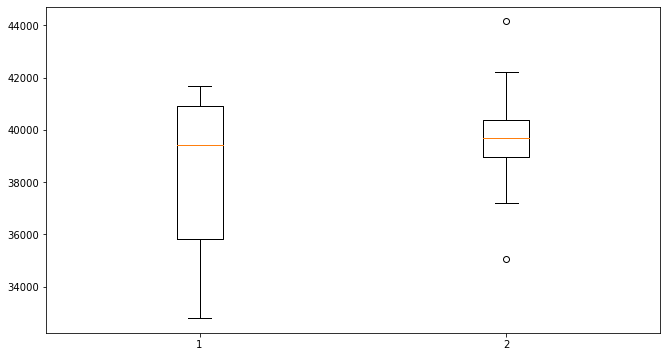

In [316]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(11,6))
bp = ax.boxplot([rmse, rmse2_SR])
plt.show()

### Podsumowanie

Przy ustawionym ziarnie losowości otrzymujemy, że wartości RMSE, gdy usuwaliśmy wartości tylko z jednej kolumny są przeciętnie niższe (mamy niższą wartość minimalną, maksymalną i wszystkie kwartyle) - czyli lepiej. Jest to zgodne z intuicją, że przy większych brakach w danych używane narzędzie będzie zachowywało się gorzej, ale przy ekspermentowaniu z ziarnem losowości tak naprawdę otrzymywałem wyniki raz takie, a raz takie, że w drugim eksperymencie braki zostały dopasowane lepiej (więc ciężko ocenić, czy braki w drugiej kolumnie realnie bardzo wpływają na zachowanie narzędzia).

Podsumowując, używane narzędzie raczej nie spisało się dobrze, więc w takim przypadku jego używanie jest słabym pomysłem (zresztą nic dziwnego, ciężko ustalić "it_seller_rating" na podstawie nabardziej podobnych wierszy, gdy mamy dane kolumny tylko "price" i "it_quantity").